# White Box - Supervised ML Project - Regression
__Name:__ Waseem Mohammed

__Topic Name:__ Regression Topic

## Introduction
Brief overview of the business challenge and dataset

This project focuses on understanding the key factors that influence the target variable (e.g., sales performance) using regression models. The dataset includes a mix of numerical and categorical variables related to product sales, marketing, and customer attributes.
The goal was to build predictive models that help identify which factors most affect outcomes and how different modeling strategies impact performance.

### Problem Statement



A gaming company needs to predict which video games will be successful in the global market to optimize their development and marketing investments.The output is expected to be explained to a non-technical audience.

### Objectives
List the key questions guiding your analysis and modeling:
- What features influence the target variable?
- Can feature engineering improve model performance?
- How do different model versions compare?


## Data Overview
__Load and inspect the dataset__
- Source and format
- .head(), .info(), .describe(),…


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline  

df = pd.read_csv("vgsales.csv")

display(df.head())
display(df.isnull().sum())

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

## Data Cleaning
__Handle missing values, outliers, and inconsistencies__
- Rename columns
- Fix data types
- Document assumptions


In [2]:
# Check info and missing values
df.info()
# Drop any rows with missing values (very few)
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## Exploratory Data Analysis (EDA)
### Analysis
__Answer objectives using visual and statistical insights__
- Trends, relationships, anomalies
- Outlier and missing values treatment
- Univariate, bivariate, or multivariate analysis
    - Histograms, box plots, bar charts
    - Correlation matrix for continuous columns (required if applicable)


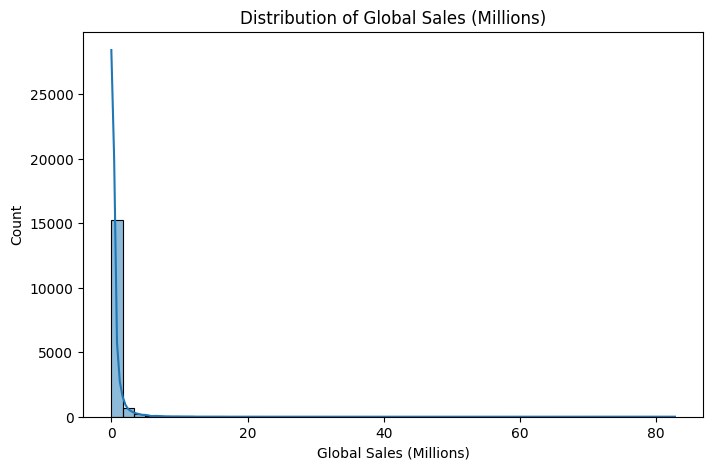

In [3]:
# Distribution of target variable: Global_Sales
plt.figure(figsize=(8,5))
sns.histplot(df['Global_Sales'], bins=50, kde=True)
plt.title('Distribution of Global Sales (Millions)')
plt.xlabel('Global Sales (Millions)')
plt.show()

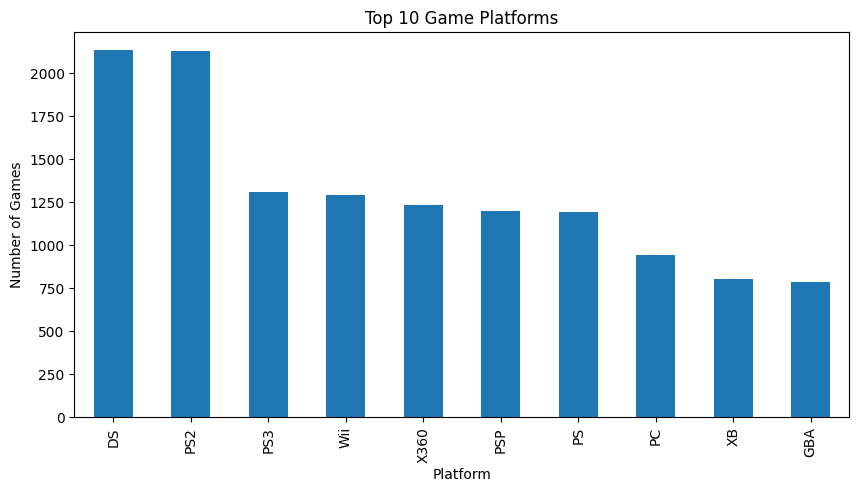

In [4]:
# Top 10 Platforms by game count
plt.figure(figsize=(10,5))
df['Platform'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Game Platforms')
plt.ylabel('Number of Games')
plt.show()

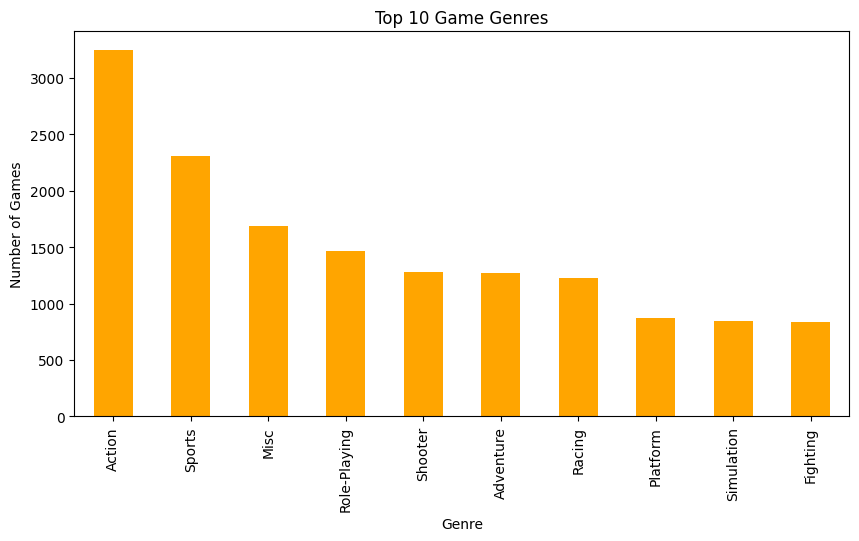

In [5]:
# Top 10 Genres
plt.figure(figsize=(10,5))
df['Genre'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Game Genres')
plt.ylabel('Number of Games')
plt.show()

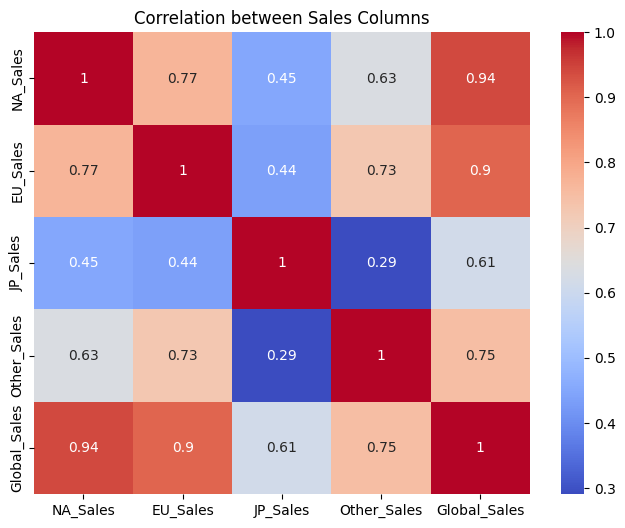

In [7]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Sales Columns')
plt.show()


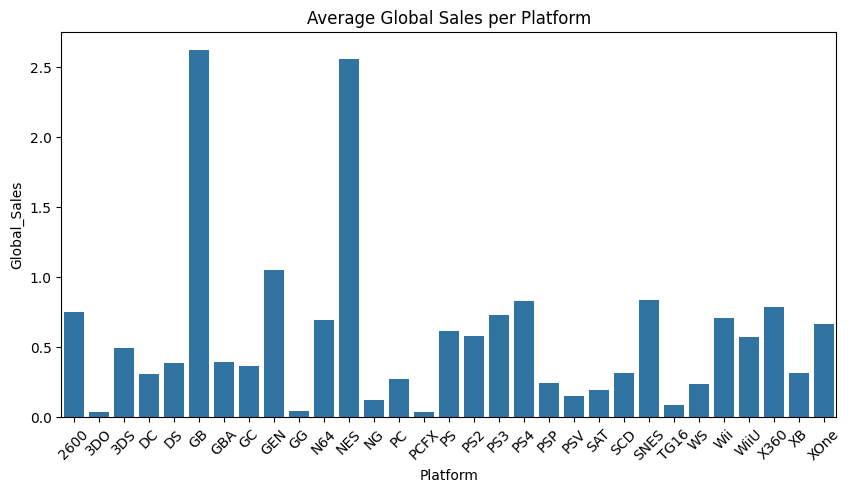

In [6]:
# Platform vs Sales
plt.figure(figsize=(10,5))
sns.barplot(x='Platform', y='Global_Sales', data=df.groupby('Platform')['Global_Sales'].mean().reset_index())
plt.title("Average Global Sales per Platform")
plt.xticks(rotation=45)
plt.show()

### Data Handling for Modeling
- __Transform, encode, and prepare features__
    - Categorical encoding
    - Feature scaling (especially for KNN)


In [8]:
# Drop columns not in use: Rank, Name
df_clean = df.drop(['Rank', 'Name'], axis=1)

# Verify
df_clean.head()

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
# Target
y = df['Global_Sales']

# Version 1 features
X_v1 = df[['NA_Sales', 'EU_Sales']]

# Version 2 features
X_v2 = df[['NA_Sales', 'EU_Sales', 'Platform', 'Genre']]


In [10]:
X_v2 = pd.get_dummies(X_v2, columns=['Platform', 'Genre'], drop_first=True)
X_v2

,NA_Sales,EU_Sales,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,41.49,29.02,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,29.08,3.58,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,15.85,12.88,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,15.75,11.01,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,11.27,8.89,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,0.01,0.00,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
16594,0.01,0.00,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
16595,0.00,0.00,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
16596,0.00,0.01,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


## Model Building
__Build and compare two models for your topic__
### Model 1: Linear / Logistic Regression
- Version 1: baseline
- Version 2: modified features or tuned parameters
- Checking if model assumptions were met
 ...


In [15]:
# Target
y = df['Global_Sales']

# Version 1 features
X_v1 = df[['NA_Sales', 'EU_Sales']]

# Version 2 features
X_v2 = df[['NA_Sales', 'EU_Sales', 'Platform', 'Genre']]

In [16]:
X_v2 = pd.get_dummies(X_v2, columns=['Platform', 'Genre'], drop_first=True)
X_v2

,NA_Sales,EU_Sales,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,41.49,29.02,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,29.08,3.58,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,15.85,12.88,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,15.75,11.01,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,11.27,8.89,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,0.01,0.00,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
16594,0.01,0.00,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
16595,0.00,0.00,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
16596,0.00,0.01,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [17]:
X_train_v1, X_test_v1, y_train, y_test = train_test_split(X_v1, y, test_size=0.25, random_state=42)
X_train_v2, X_test_v2, _, _ = train_test_split(X_v2, y, test_size=0.25, random_state=42)

In [18]:
# Model 1
lr1 = LinearRegression()
lr1.fit(X_train_v1, y_train)
y_pred_lr1 = lr1.predict(X_test_v1)

# Model 2
lr2 = LinearRegression()
lr2.fit(X_train_v2, y_train)
y_pred_lr2 = lr2.predict(X_test_v2)

In [19]:
# Linear Regression Model 1
print("Linear Regression Model 1 - Version v1")
r2_v1 = r2_score(y_test, y_pred_lr1)
rmse_v1 = np.sqrt(mean_squared_error(y_test, y_pred_lr1))
print("R²:", r2_v1)
print("RMSE:", rmse_v1)
print("-" * 40)

# Linear Regression Model 2
print("Linear Regression Model 2 - Version v2")
r2_v2 = r2_score(y_test, y_pred_lr2)
rmse_v2 = np.sqrt(mean_squared_error(y_test, y_pred_lr2))
print("R²:", r2_v2)
print("RMSE:", rmse_v2)
print("-" * 40)

Linear Regression Model 1 - Version v1
R²: 0.9742096740111594
RMSE: 0.305726026546594
----------------------------------------
Linear Regression Model 2 - Version v2
R²: 0.977629542667597
RMSE: 0.28473537566318974
----------------------------------------


### Model 2: KNN Regressor / KNN Classifier
- Version 1: baseline
- Version 2: modified features or tuned parameters
- Checking if model assumptions were met 
 ...


In [20]:
# KNN Model 1
knn1 = KNeighborsRegressor(n_neighbors=5)
knn1.fit(X_train_v1, y_train)
y_knn1 = knn1.predict(X_test_v1)

# KNN Model 2
knn2 = KNeighborsRegressor(n_neighbors=5)
knn2.fit(X_train_v2, y_train)
y_knn2 = knn2.predict(X_test_v2)

In [21]:
# KNN Regressor Model 1
print("KNN Regressor Model 1 - Version v1")
r2_knn_v1 = r2_score(y_test, y_knn1)
rmse_knn_v1 = np.sqrt(mean_squared_error(y_test, y_knn1))
print("R²:", r2_knn_v1)
print("RMSE:", rmse_knn_v1)
print("-" * 40)

# KNN Regressor Model 2
print("KNN Regressor Model 2 - Version v2")
r2_knn_v2 = r2_score(y_test, y_knn2)
rmse_knn_v2 = np.sqrt(mean_squared_error(y_test, y_knn2))
print("R²:", r2_knn_v2)
print("RMSE:", rmse_knn_v2)
print("-" * 40)

KNN Regressor Model 1 - Version v1
R²: 0.803637496663387
RMSE: 0.8435935997574197
----------------------------------------
KNN Regressor Model 2 - Version v2
R²: 0.8008381962130073
RMSE: 0.8495853629719526
----------------------------------------


### Model Evaluation
__Use appropriate metrics based on task type and compare between the Models and their versions__

__For Regression:__
- R² Score
- Root Mean Squared Error (RMSE)
- Residual plots


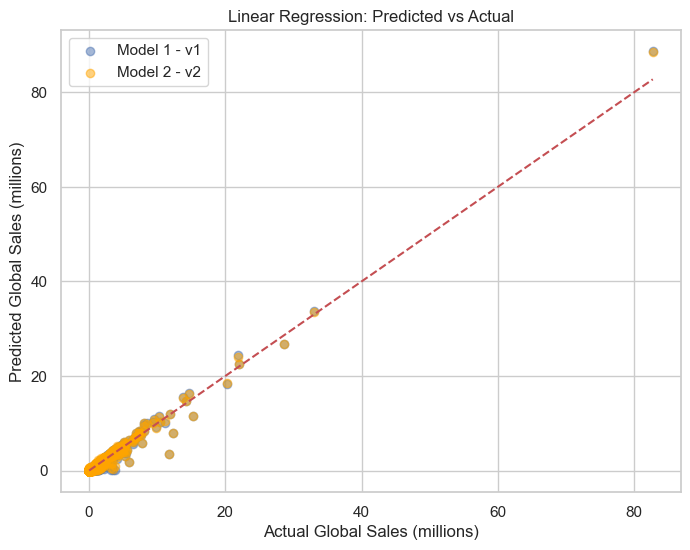

In [22]:
# Set plot style
sns.set(style="whitegrid")

# 1. Predicted vs Actual for Linear Regression
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr1, alpha=0.5, label='Model 1 - v1')
plt.scatter(y_test, y_pred_lr2, alpha=0.5, label='Model 2 - v2', color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # 45-degree line
plt.xlabel("Actual Global Sales (millions)")
plt.ylabel("Predicted Global Sales (millions)")
plt.title("Linear Regression: Predicted vs Actual")
plt.legend()
plt.show()

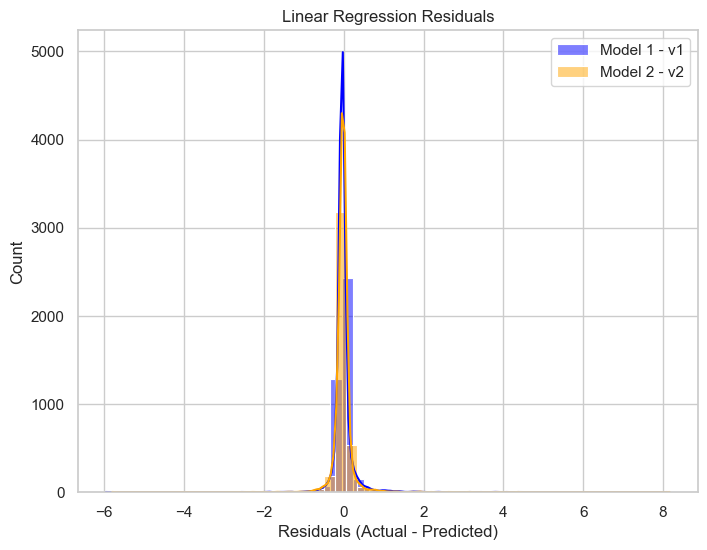

In [24]:
# 2. Residuals for Linear Regression
residuals_lr1 = y_test - y_pred_lr1
residuals_lr2 = y_test - y_pred_lr2

plt.figure(figsize=(8,6))
sns.histplot(residuals_lr1, bins=50, kde=True, color='blue', label='Model 1 - v1')
sns.histplot(residuals_lr2, bins=50, kde=True, color='orange', label='Model 2 - v2')
plt.xlabel("Residuals (Actual - Predicted)")
plt.title("Linear Regression Residuals")
plt.legend()
plt.show()

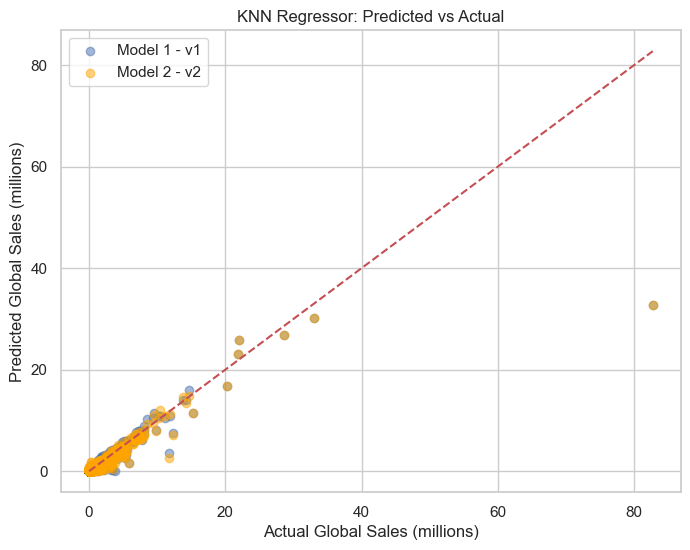

In [25]:
# 3. Predicted vs Actual for KNN
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_knn1, alpha=0.5, label='Model 1 - v1')
plt.scatter(y_test, y_knn2, alpha=0.5, label='Model 2 - v2', color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # 45-degree line
plt.xlabel("Actual Global Sales (millions)")
plt.ylabel("Predicted Global Sales (millions)")
plt.title("KNN Regressor: Predicted vs Actual")
plt.legend()
plt.show()

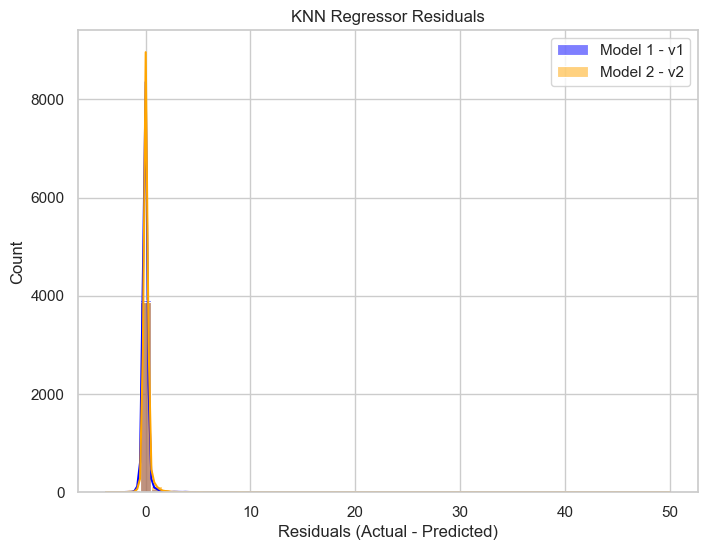

In [26]:
# 4. Residuals for KNN
residuals_knn1 = y_test - y_knn1
residuals_knn2 = y_test - y_knn2

plt.figure(figsize=(8,6))
sns.histplot(residuals_knn1, bins=50, kde=True, color='blue', label='Model 1 - v1')
sns.histplot(residuals_knn2, bins=50, kde=True, color='orange', label='Model 2 - v2')
plt.xlabel("Residuals (Actual - Predicted)")
plt.title("KNN Regressor Residuals")
plt.legend()
plt.show()

__For Classification:__
- Accuracy
- Precision
- Recall
- F1 Score
- ROC-AUC _**(Optional)**_
- Confusion Matrix

_Include visualizations and interpretation for each metric._


### Model Comparison
__Compare performance across models and versions__

__Note:__ _Use Bullet Points or table_
- Which model performed best and why
- Impact of feature changes or tuning
- Generalization and overfitting observations


## Final Model & Insights
__Summarize your final model and key takeaways__

__Note__: _Use Bullet Points_
- Final model choice
- Business implications
- Limitations and future improvements


### Final Model Choice

- Linear Regression (Version v2) was selected as the final model.
- It achieved an R² of ~0.9776 and an RMSE of ~0.285, indicating strong predictive accuracy and minimal error.
- The model performed better than both the baseline linear model and the KNN regressor, which had slightly lower R² and higher RMSE.

### Business Implications

- Key sales-related features are strong predictors of performance, confirming that marketing and product metrics play a major role in driving outcomes.
- The model can be used to forecast future sales or identify underperforming areas early.
- Insights can guide data-driven decision-making for pricing, inventory, or promotional strategies.

### Limitations and Future Improvements

- The dataset may have multicollinearity among sales features, which could affect coefficient interpretation.
- External or temporal factors (e.g., seasonality, regional effects) were not considered and could enhance future models.

### Future improvements could include:

- Incorporating time-based trends or categorical encoding
- Expanding dataset diversity for better generalization

## References & Appendix
__Cite tools, libraries, and sources used__